In [181]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt;

In [182]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

# Data

- **NETD** Employment, persons: all domestic industries (National accounts) (NETD) - 1000 persons
- **NLTN** Total labour force (Labour force statistics) (NLTN) -  1000 persons
- **OKND** Net capital stock at 2010 prices: total economy (OKND) - Mrd ECU/EUR
- **OVGD** Gross domestic product at 2010 reference levels (OVGD) - 
- **UUTGI** Total expenditure excluding interest: general government :- ESA 2010 (UUTGI) - Mrd ECU/EUR
- **ZUTN** Unemployment rate: total :- Member States: definition EUROSTAT (ZUTN) - (Percentage of active population) 
- **ZVGDF** Total factor productivity: total economy (ZVGDF) - (2010 = 100) 
- **ZVGDK** Capital share in total factor productivity: total economy (ZVGDK)











In [6]:
def data_handling(data_source):
    study_categories = list(set(data_source.id))
    study_countries = data_source.Country.value_counts()[data_source.Country.value_counts() == max(data_source.Country.value_counts())].index.values
    study_years = [str(i) for i in range(1960, 2020)]
    
    counter = 0
    col = ["country", "year"]; col.extend(list(set(data_source.id)))
    data = pd.DataFrame(index=col)
    
    for country in study_countries:
        for year in study_years:
            counter += 1
            indicators = [data_source[(data_source.Country == country) & (data_source.id == cat)][year].values[0] for cat in study_categories]
            row_values = [country, int(year)]; row_values.extend(indicators)
            data[counter] = row_values
    
    return(data.transpose(), study_countries, study_categories)

In [7]:
source = pd.read_csv("./data.csv")
data, countries, indicators = data_handling(source)

In [187]:
data[data.country == "Portugal"].tail(20)

,country,year,NLTN,OKND,ZVGDF,OVGD,NETD,ZVGDK,UUTGI,ZUTN
881,Portugal,2000,5319.28,427.008,99.5746,167.145,5041.86,106.551,50.9192,5.1
882,Portugal,2001,5413.2,445.927,98.7991,170.393,5130.09,105.595,55.8576,5.1
883,Portugal,2002,5486.88,462.395,97.9815,171.703,5149.93,104.472,58.3111,6.2
884,Portugal,2003,5504.5,475.06,96.6768,170.099,5100.19,103.061,62.3578,7.4
885,Portugal,2004,5491.34,487.163,97.9409,173.181,5064.18,102.784,66.295,7.8
886,Portugal,2005,5533.31,498.696,98.1148,174.509,5040.96,102.18,70.0077,8.8
887,Portugal,2006,5573.01,509.499,98.6002,177.219,5060.86,101.951,70.6144,8.9
888,Portugal,2007,5602.45,520.914,100.215,181.635,5061.58,102.044,72.8857,9.1
889,Portugal,2008,5608.46,531.722,99.4192,181.997,5080.13,101.339,75.5366,8.8
890,Portugal,2009,5558.41,538.765,97.6607,176.577,4941.69,99.7095,82.8978,10.7


<br>

In [174]:
def plot_PolicyCycle(data_source):
    data_PolicyCycle = data_source[data_source.country == "Greece"][["year", "OVGD", "UUTGI"]].dropna().set_index("year").pct_change().iloc[1:]
    
    x = list(data_PolicyCycle.OVGD.values); y = list(data_PolicyCycle.UUTGI.values)
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(x, y)

    for i, txt in enumerate(data_PolicyCycle.index.values):
        ax.annotate(txt, (x[i], y[i]))
        
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.title("Policy in Greece", fontsize=20)
    plt.ylabel("Change in G")
    plt.xlabel("Change in GDP")
    
    return(plt.show())

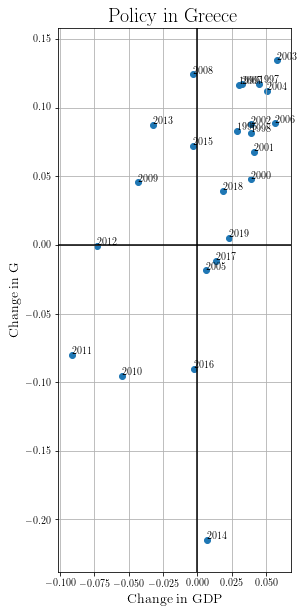

In [175]:
plot_PolicyCycle(data)

<br>

## Statistical

In [169]:
def statistical(data_input):
    data_input=data_input[data_input.year >= 1995]
    
    study_countries = list(set(data_input.country))
    study_years = [i for i in range(1995, 2020)]
    
    output_trend = pd.DataFrame(index=study_years)
    output_cycle = output_trend.copy()
    
    for country in study_countries:
        country_series = data_input[data_input.country == country].OVGD.values*10**9
        cycle, trend = sm.tsa.filters.hpfilter(country_series, 1600)
        
        output_trend[country] = trend
        output_cycle[country] = cycle
            
    return((output_trend+output_cycle).dropna(axis=1), output_trend.dropna(axis=1), output_cycle.dropna(axis=1))

In [170]:
statistical_gdp, statistical_potential, statistical_gap = statistical(data)

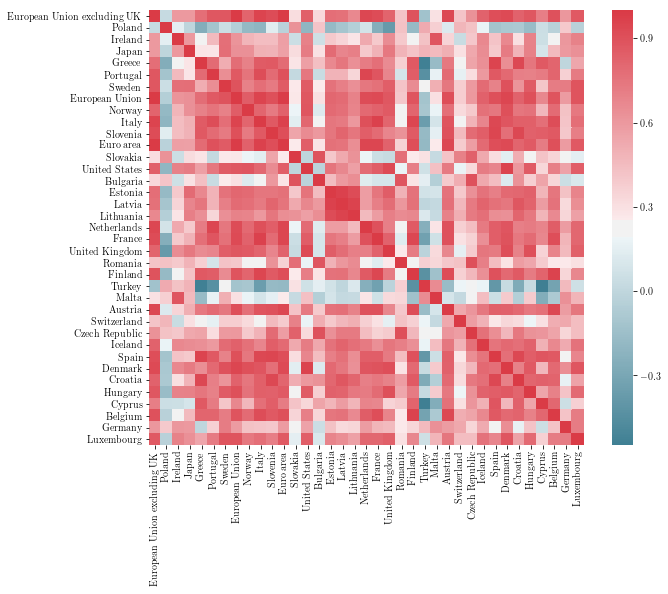

In [185]:
f, ax = plt.subplots(figsize=(10, 8))
corr = statistical_gap.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<Figure size 432x288 with 0 Axes>

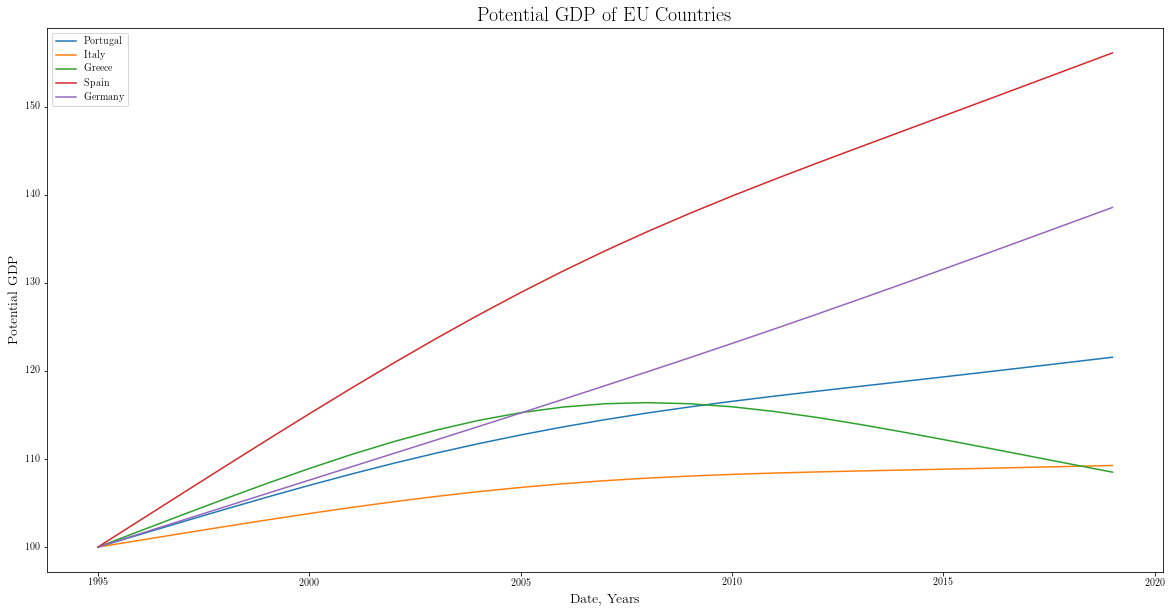

In [171]:
plt.figure()
PIGS=["Portugal", "Italy", "Greece", "Spain", "Germany"]
statistical_potential.divide(statistical_potential.iloc[0] / 100)[PIGS].plot(figsize=(20, 10))
plt.title("Potential GDP of EU Countries", fontsize=20)
plt.ylabel("Potential GDP")
plt.xlabel("Date, Years")
plt.show()

<Figure size 432x288 with 0 Axes>

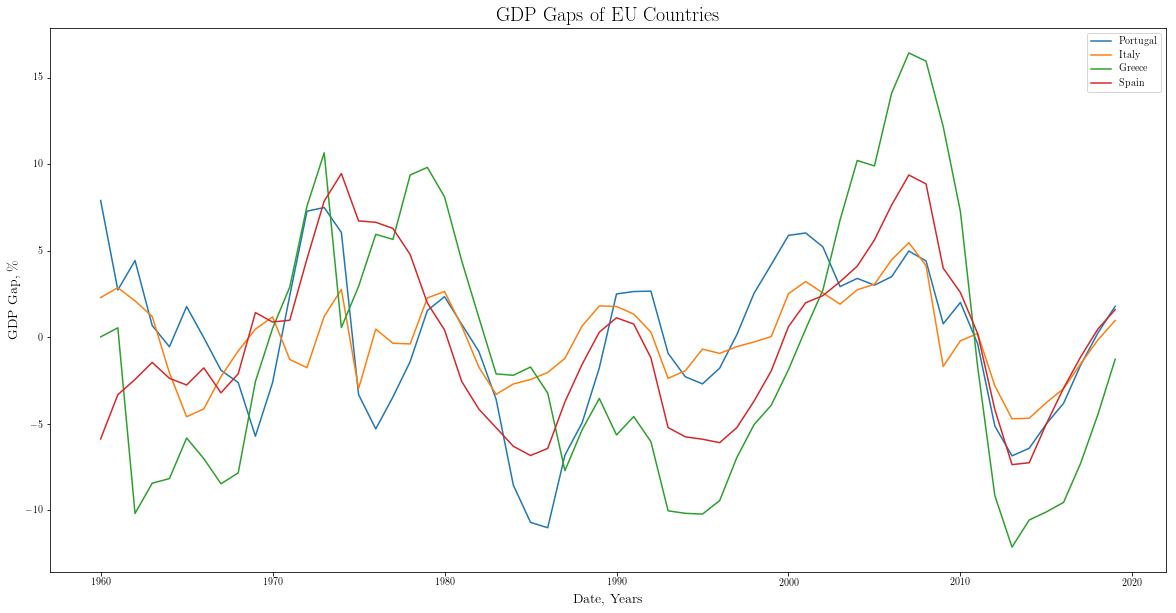

In [154]:
plt.figure()
PIGS=["Portugal", "Italy", "Greece", "Spain"]
((statistical_gap.divide(statistical_gdp)*100))[PIGS].plot(figsize=(20, 10))
plt.title("GDP Gaps of EU Countries", fontsize=20)
plt.ylabel("GDP Gap, \%")
plt.xlabel("Date, Years")
plt.show()

<br>

## Structural

$$Y_t = A_t K_t^\alpha N_t^{1-\alpha}$$

- **NETD** Employment, persons: all domestic industries (National accounts) (NETD) - 1000 persons
- **NLTN** Total labour force (Labour force statistics) (NLTN) -  1000 persons
- **OKND** Net capital stock at 2010 prices: total economy (OKND) - Mrd ECU/EUR
- **OVGD** Gross domestic product at 2010 reference levels (OVGD) - 
- **UUTGI** Total expenditure excluding interest: general government :- ESA 2010 (UUTGI) - Mrd ECU/EUR
- **ZUTN** Unemployment rate: total :- Member States: definition EUROSTAT (ZUTN) - (Percentage of active population) 
- **ZVGDF** Total factor productivity: total economy (ZVGDF) - (2010 = 100) 
- **ZVGDK** Capital share in total factor productivity: total economy (ZVGDK)

- **Y = OVGD** Gross domestic product at 2010 reference levels (OVGD)
- **A** Need to calculate
- **$\alpha$ = ZVGDK** Capital share in total factor productivity: total economy (ZVGDK)
- **K = OKND** Net capital stock at 2010 prices: total economy (OKND) - Mrd ECU/EUR
- **N = NETD** Employment, persons: all domestic industries (National accounts) (NETD) - 1000 persons

- **NLTN** Total labour force (Labour force statistics) (NLTN) -  1000 persons
- **ZUTN** Unemployment rate: total :- Member States: definition EUROSTAT (ZUTN) - (Percentage of active population) 

In [87]:
data[(data.country == "Luxembourg") & (data.year >= 1995)][["year", "OVGD", "ZVGDK", "OKND", "NETD", "NLTN", "ZUTN"]]

,year,OVGD,ZVGDK,OKND,NETD,NLTN,ZUTN
36,1995,23.0709,97.272,51.2715,216.1,173.53,2.9
37,1996,23.3912,96.5879,52.7592,221.72,175.27,2.9
38,1997,24.7268,97.7247,54.4185,229.24,177.56,2.7
39,1998,26.2215,98.8178,56.376,239.29,181.23,2.7
40,1999,28.4453,100.502,59.0259,250.76,184.6,2.4
41,2000,30.7891,102.599,61.1785,264.05,188.95,2.2
42,2001,31.5687,102.066,63.4183,279.13,193.63,1.9
43,2002,32.7745,102.328,65.4865,287.2,197.83,2.6
44,2003,33.3085,101.635,67.5096,292.5,202.32,3.8
45,2004,34.5116,101.759,69.7688,299.39,206.44,5


In [176]:
def structural(data_input):
    study_countries = list(set(data_input.country))
    study_years = [i for i in range(1995, 2020)]
    study_indicators = ["year", "OVGD", "ZVGDK", "OKND", "NETD", "NLTN", "ZUTN"]
    
    output_trend = pd.DataFrame(index=study_years)
    output_cycle = output_trend.copy()
    
    data_input=data_input[data_input.year >= 1995]
    
    for country in study_countries:
        
        country_indicators = pd.DataFrame()
        for indicator in study_indicators:
            if indicator in ["NETD", "NLTN"]:
                country_indicators[indicator] = data_input[data_input.country == country][indicator]*1000
            elif indicator == "OVGD":
                country_indicators[indicator] = data_input[data_input.country == country][indicator]*10**9
            else:
                country_indicators[indicator] = data_input[data_input.country == country][indicator]
        country_indicators = country_indicators.set_index("year")

        # Calculate TFP
        country_indicators["TFP"] = country_indicators["OVGD"]/(country_indicators["OKND"].pow(country_indicators["ZVGDK"])*
                                                                country_indicators["NETD"].pow(-country_indicators["ZVGDK"]+1))
        
        # Calculate natural rate of unemployment
        cycle, country_indicators["NRU"] = sm.tsa.filters.hpfilter(country_indicators["ZUTN"].values/100, 1600)
        
        # Calculate trend and gap
        output_trend[country] = country_indicators["TFP"]*(country_indicators["OKND"].pow(country_indicators["ZVGDK"])*
                                                           (country_indicators["NLTN"]*(-country_indicators["NRU"]+1)).pow(-country_indicators["ZVGDK"]+1))        
        
        output_cycle[country] = country_indicators["OVGD"]-output_trend[country]
            
    return((output_trend+output_cycle).dropna(axis=1), output_trend.dropna(axis=1), output_cycle.dropna(axis=1), country_indicators)

In [177]:
structural_gdp, structural_trend, structural_cycle, temp = structural(data)

In [178]:
temp

,OVGD,ZVGDK,OKND,NETD,NLTN,ZUTN,TFP,NRU
year,,,,,,,,
1995,2.30709e+10,97.272,51.2715,216100,173530,2.9,inf,0.022711
1996,2.33912e+10,96.5879,52.7592,221720,175270,2.9,inf,0.024399
1997,2.47268e+10,97.7247,54.4185,229240,177560,2.7,inf,0.026091
1998,2.62214e+10,98.8178,56.376,239290,181230,2.7,inf,0.027793
1999,2.84453e+10,100.502,59.0259,250760,184600,2.4,inf,0.029514
2000,3.07891e+10,102.599,61.1785,264050,188950,2.2,inf,0.031259
2001,3.15687e+10,102.066,63.4183,279130,193630,1.9,inf,0.033033
2002,3.27745e+10,102.328,65.4865,287200,197830,2.6,inf,0.034833
2003,3.33084e+10,101.635,67.5096,292500,202320,3.8,inf,0.036648


In [98]:
structural_cycle

""
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004


In [40]:
plt.figure()
structural_trend.divide(structural_trend.iloc[0] / 100).plot(figsize=(20, 10))
plt.title("Potential GDP of EU Countries", fontsize=20)
plt.ylabel("Potential GDP")
plt.xlabel("Date, Years")
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

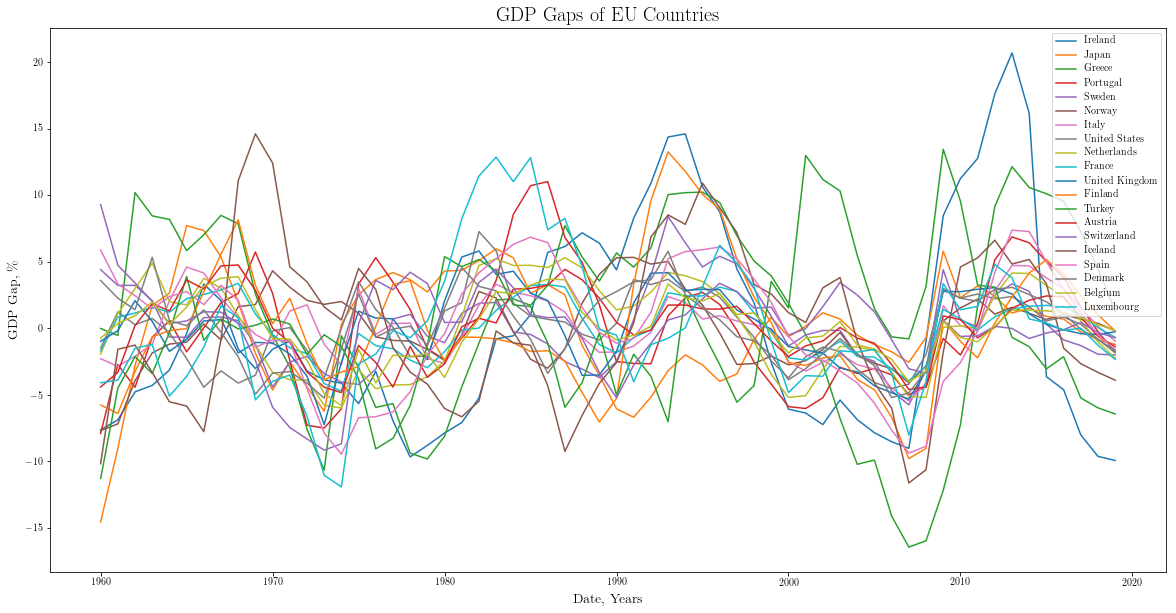

In [29]:
plt.figure()
((statistical_trend.divide(statistical_gdp)-1)*100).plot(figsize=(20, 10))
plt.title("GDP Gaps of EU Countries", fontsize=20)
plt.ylabel("GDP Gap, \%")
plt.xlabel("Date, Years")
plt.show()

<br>